In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# load image path

from keras.utils.image_utils import load_img,img_to_array
img_folder = Path("data")

label = ["daisy","dandelion","rose",'sunflower',"tulip"]
test_image = list([])
X_data = np.empty((0,32,32))
Y_label = []

for i in range(len(label)):
    train_folder = img_folder/label[i]
    test = list(train_folder.glob("*.jpg"))
    test_image = test_image + test
    Y_label = Y_label+[i]*len(list(train_folder.glob("*.jpg")))

for  i in range(len(test_image)):
    image_path = str(test_image[i])
    img = load_img(image_path,target_size=(32,32),color_mode = "grayscale")
    img= img_to_array(img)
    img = img.astype("float32")/255
    

    img = np.reshape(img,(1,32,32))
    X_data = np.vstack((X_data,img))
print(X_data.dtype)

2022-11-15 11:07:10.673638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 11:07:10.812087: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-15 11:07:10.812102: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-15 11:07:10.832027: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 11:07:11.374263: W tensorflow/stream_executor/platform/de

float64


In [3]:
print(X_data.shape)

(4316, 32, 32)


In [4]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = "relu", input_shape = (32,32,1),padding = "same"))
model.add(MaxPooling2D((2,2),padding="same"))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2),padding = "same"))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(5,activation="softmax"))

2022-11-15 11:07:31.379977: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-15 11:07:31.380013: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-15 11:07:31.380049: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dauphongtantan): /proc/driver/nvidia/version does not exist
2022-11-15 11:07:31.380261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer = Adam(),metrics= ['accuracy'])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_label,test_size=0.3,shuffle=True)

In [7]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [8]:
from keras.callbacks import EarlyStopping
earlyStop = EarlyStopping(monitor='loss', patience=3)

In [9]:
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 32, validation_data=[X_test,Y_test],callbacks = [earlyStop])

Epoch 1/100
95/95 [==============================] - 2s 17ms/step - loss: 1.5584 - accuracy: 0.3025 - val_loss: 1.4864 - val_accuracy: 0.3606
Epoch 2/100
95/95 [==============================] - 1s 14ms/step - loss: 1.4385 - accuracy: 0.3850 - val_loss: 1.4100 - val_accuracy: 0.4085
Epoch 3/100
95/95 [==============================] - 1s 14ms/step - loss: 1.3651 - accuracy: 0.4416 - val_loss: 1.4104 - val_accuracy: 0.4139
Epoch 4/100
95/95 [==============================] - 1s 14ms/step - loss: 1.2845 - accuracy: 0.4859 - val_loss: 1.3417 - val_accuracy: 0.4486
Epoch 5/100
95/95 [==============================] - 1s 14ms/step - loss: 1.1769 - accuracy: 0.5237 - val_loss: 1.3499 - val_accuracy: 0.4432
Epoch 6/100
95/95 [==============================] - 1s 15ms/step - loss: 1.1083 - accuracy: 0.5631 - val_loss: 1.3169 - val_accuracy: 0.4687
Epoch 7/100
95/95 [==============================] - 1s 14ms/step - loss: 1.0005 - accuracy: 0.6193 - val_loss: 1.3987 - val_accuracy: 0.4618
Epoch 

1/1 [==============================] - 0s 54ms/step
daisy


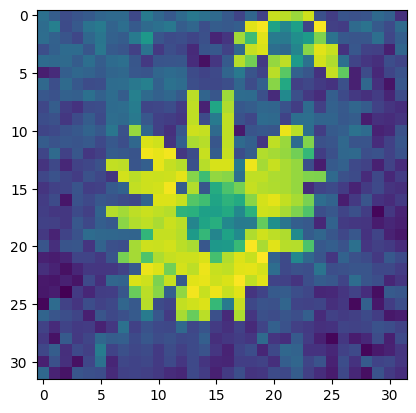

In [10]:
from keras.utils.image_utils import load_img
image = load_img('img/daisy.jpeg', target_size=(32,32),color_mode="grayscale") #,grayscale=True
from keras.utils.image_utils import img_to_array
img = img_to_array(image)
img = img.reshape(1,32,32)
img = img.astype('float32')
img = img/255
tag = np.argmax(model.predict(img),axis=1)
plt.imshow(image)
print(label[tag[0]])

1/1 [==============================] - 0s 16ms/step
rose


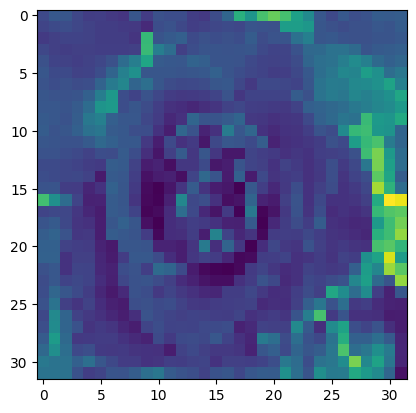

In [11]:
from keras.utils.image_utils import load_img
image = load_img('img/rose.jpeg', target_size=(32,32),color_mode="grayscale") #,grayscale=True
from keras.utils.image_utils import img_to_array
img = img_to_array(image)
img = img.reshape(1,32,32)
img = img.astype('float32')
img = img/255
tag = np.argmax(model.predict(img),axis=1)
plt.imshow(image)
print(label[tag[0]])